# Using Machine Learning Tools 2020
# Assignment 3: Deep Neural Networks

## Overview

In this assignment you will implement two types of deep learning network (fully connected and convolutional neural networks) to classify images of hands in poses corresponding to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train two different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore different cases of over-fitting and under-fitting, and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing optimised deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, and optimize performance. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General Instructions 

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, as indicated in this template.
 - Your code must use the current stable versions of python libraries, not outdated versions.
 - All data processing must be done within the notebook after loading the data.
 - Comment your code, so that its purpose is clear to the reader.
 - **Before submitting your notebook, make sure to run all cells in your final notebook so that it works correctly.**

This assignment is divided into several tasks. Stick to this notebook format, although feel free to add cells throughout, but keep the same numbering for all instructions, questions and answers.

Make sure to answer every question with *separate answer text (“Answer: ...”) in a cell* and check that you answered all sub-questions/aspects within the question. The text answers are worth points.

Make the *figures self-explanatory and unambiguous*. Always include axis labels, if available with units, unique colours and markers for each curve/type of data, a legend and a title. Give every figure a number (e.g. at start of title), so that it can be referred to from different parts of the text/notebook. This is also worth points!

## Outline

The main steps in the assignment are outlined here, so that you can appreciate the bigger picture. Some of the steps are purely for testing your knowledge and demonstrating certain things, but in general it outlines the main process that you would go through to solve a practical problem.

- To start with we load the data, visualise and explore it. You should always do this in any problem.

- After this we will establish how long a simple network takes to run on a given amount of training data on your computer. This is important for this assignment as you have to run on your own machines, and we need to make sure it runs in a reasonable amount of time. In a practical problem you are likely to have a lot more data and will use bigger networks, but it is common that you will have a limit on the available resources and time, so establishing a baseline timing and deciding on constraints is a very common task in any problem.

- Following this we will go through a few specific cases, looking at some extremes and learning to identify common problems, how to spot them and options for how to correct for them.

- Afterwards, the main bulk of the assignment will focus on tuning the networks to give the best performance. This is something you will need to do systematically, and demonstrates the approach that you would take in any practical problem. Some limitations will be given, in order to help you in this assignment, but it should be clear how to extrapolate these to a more general setting for other datasets and tasks.

- Once the optimal network is found, the performance will be evaluated.

- A free choice element at the end will allow you to explore one extra aspect, beyond the limitations imposed above.


Feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

## Your Details

In [216]:
#SHUBHAM GUPTA
# A1787223

## Initialise environment

In [217]:
# Load libraries, etc.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import keras 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import time 
from sklearn.metrics import confusion_matrix
import seaborn as sn
# Add other libraries here

In [218]:
keras.__version__

'2.3.1'

In [219]:
from numpy.random import seed
seed(1)

---

## 1. Explore the Dataset (10%)

### 1.1 Load the data
 - We will use an MNIST-style dataset of sign language signals (hands), which are all small images (28x28)
 - Files are sign_mnist_train.csv and sign_mnist_test.csv
 - Split up labels and images
 - Reshape images appropriately

In [220]:
#Reading the data 

In [221]:
train_data = pd.read_csv("sign_mnist_train.csv")
test_data = pd.read_csv("sign_mnist_test.csv")

In [222]:
# the data has Label column with the pixel columns which first has to removed 
# and then data has to be reshaped
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [223]:
# same have to be done for test data 
test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [224]:
# separating labels from training  data and test data 
#then converting our data from dataframe to a numpy array for our deep learning models 

In [225]:
x_train_full = train_data.iloc[:,:-1].to_numpy(dtype=np.float64)
y_train_full = train_data.iloc[:,0].astype('category').to_numpy()
x_test_full = test_data.iloc[:,:-1].to_numpy(dtype=np.float64)
y_test_full = test_data.iloc[:,0].astype('category').to_numpy()

In [226]:
# 27455 training images available with 784 pixels per image (28x28)
x_train_full.shape


(27455, 784)

In [227]:
# 7172 test images available with 784 pixels per image (28x28)
x_test_full.shape

(7172, 784)

In [228]:
# reshaping the training and test data for a 28*28 image with depth 1 
x_train_full = x_train_full.reshape(x_train_full.shape[0], 28, 28, 1)
x_test_full = x_test_full.reshape(x_test_full.shape[0], 28, 28, 1)

In [229]:
# 27455 images with 28x28 shape with depth 1 
x_train_full.shape

(27455, 28, 28, 1)

In [230]:
# 7172 images with 28x28 shape with depth 1 
x_test_full.shape

(7172, 28, 28, 1)

### 1.2 Look at the data
- Print out some descriptive information about the dataset
- Show one example image of each class

In [231]:
print(train_data.info())
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [232]:
print(test_data.info())
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [233]:
# FOLLOWING IS THE DATA PREPARATION FOR INDIVIDUAL CLASS DISPLAY
image_show = train_data.label.drop_duplicates()
image_show_data = train_data
image_show_data = train_data.drop(columns="label")
image_show_data = image_show_data.values
image_show_data_pixel = np.reshape(image_show_data,(27455,28,28))

In [234]:
# defining our class names, J & Z not included 
class_names = ["A" , "B" , "C" , "D" , "E",
              "F" , "G" , "H" , "I" , "K",
               "L" , "M" , "N" , "O" , "P",
               "Q" , "R" , "S" , "T" , "U",
               "V" , "W" , "X" , "Y" ]

One example of each image class are 


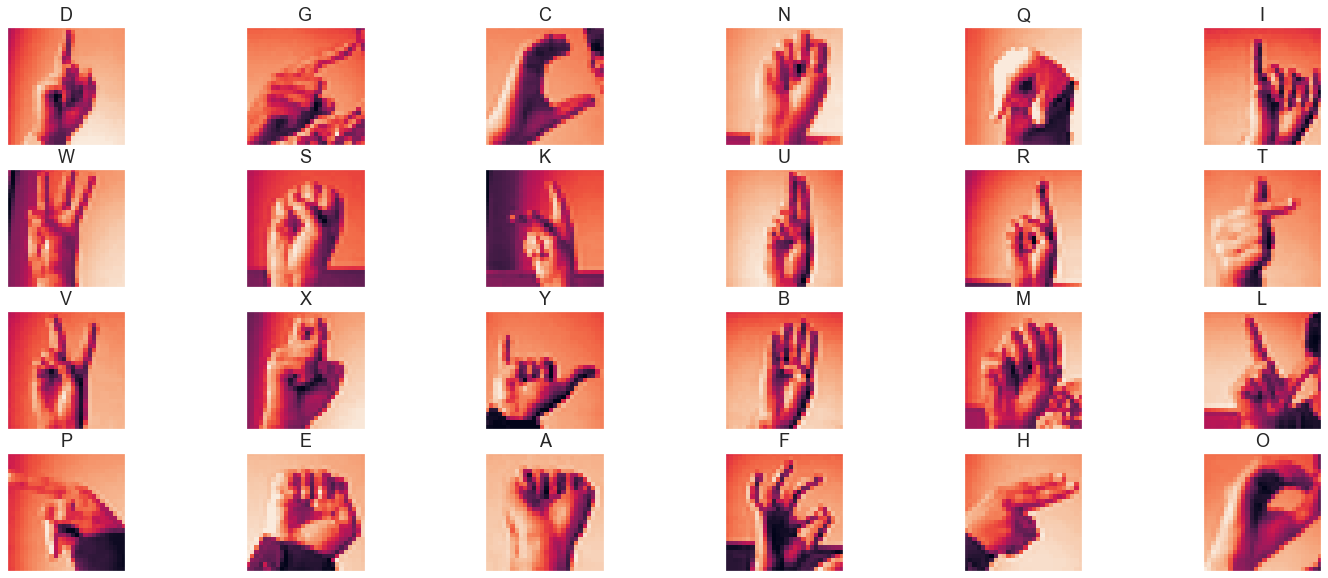

In [235]:
j=0
fig = plt.figure(figsize=(25,10))
print("One example of each image class are ")
for i in image_show.index:
    ax = fig.add_subplot(4, 6, j + 1, xticks=[], yticks=[])
    j=j+1# 3 rows , 12 columns 
    ax.imshow(np.squeeze(image_show_data_pixel[i,:,:]))
    
    if (image_show[i]>9):#becuse the label 9 is skipped entirely 
        ax.set_title("{}".format(class_names[image_show[i]-1]))
    else:
        ax.set_title("{}".format(class_names[image_show[i]]))
plt.show()

### Question 1.3
- Which pair of classes do you think will be the most difficult to distinguish?  Give a reason for your answer.

### From just looking at the above images you can see similarities between some of the signs like 
### Signs for letters S,M,N looks quite similar to each other ( which can be observed in confusion matrix later)
### Same can be said for A,E and C,O
### these are just intuition based on looking at the images 
### Our model can also not able to identify if there aren't many images available for a particular class.

### 1.4 Look at the labels
- Look at the distribution of the labels
- Adjust for anything that could cause problems later on

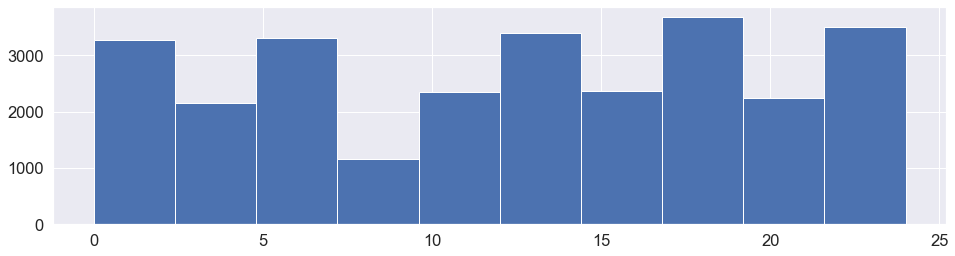

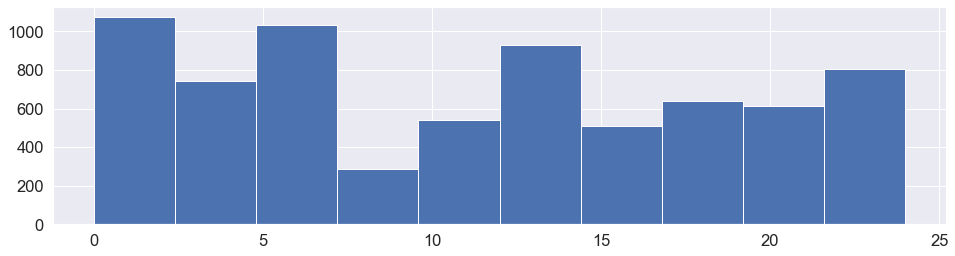

In [236]:
plt.figure(figsize=(16, 4))
plt.hist(y_train_full)
plt.show()

plt.figure(figsize=(16, 4))
plt.hist(y_test_full)
plt.show()


In [237]:
#data set looks evenly distributed for most of the labels

### 1.5 Split the data (test, validation and training) and scale it
- We will only take the first 2500 training images (which is still over 100 per class) in order to keep run-times down and to make training more challenging. In a practical situation you might either have less data than you'd like or limitations on how much can be processed, so this also reflects a common real-life constraint.
- In this case we will create both the validation and test sets from the testing dataset.  It is unusual to do this, but in this case the training set contains a lot of non-independent, augmented images and it is important that the validation images must be independent. 
- Take 1000 images each for the validation and test sets.
- Scale the data appropriately (e.g. as done for other MNIST datasets).

In [238]:
# splitting our data set 
# /255 reduce the pixel intensity 

In [239]:
x_train,y_train=x_train_full[:2500]/255,y_train_full[:2500]
x_test,y_test=x_test_full[4000:5000]/255,y_test_full[4000:5000]
x_validation,y_validation=x_test_full[:1000]/255,y_test_full[:1000]

In [240]:
# using to_categorical fixing the labels as label 9 (J), 25(Z) are not there

In [241]:
Y_train_fixed = to_categorical(y_train)
Y_validation_fixed = to_categorical(y_validation)
Y_test_fixed = to_categorical(y_test)

### 1.6 Look at label distribution
- Check the label distribution in all three sets and if there are problems, change the selection above.

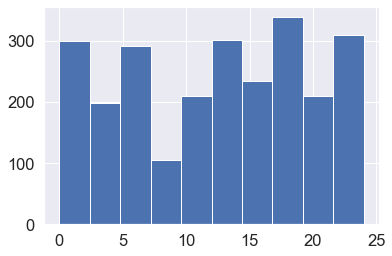

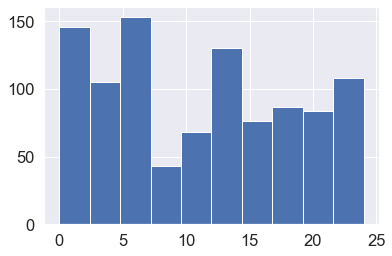

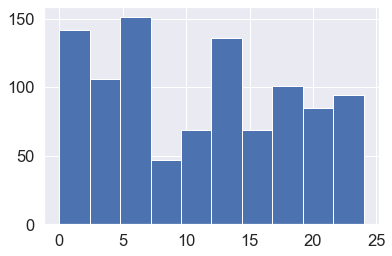

In [242]:
plt.hist(y_train)
plt.show()
plt.hist(y_validation)
plt.show()
plt.hist(y_test)
plt.show()

In [243]:
# we will be trainig our model on the training and validation data sets which looks evenly distributed for most of 
# the classes

***

## 2. Initial Deep Learning Networks (30%)

In this section you will look at a variety of networks with this data and explore various settings and outcomes.

### Question 2.1
 - We will treat this as a classification problem but we could formulate it as a regression problem instead (predicting the label values as the outcomes). Name one disadvantage that a regression approach would have.

- ANS -> Regression with not give probablity of specific label, rather it would try to output the specific label, for example for label 15 in classification we get a probablity of a particular image being to this class and in regression it would try to predict label value, which can be 15 or 14.9 or 15.5 which would break our code as 15.5 can be class 15 or class 16. 

### Question 2.2
 - What is chance level accuracy (e.g. if predictions were completely random) in this case?

- ANS-> As we know there are 24 classes (J & Z not there),
- So, the chance level accuracy for each class will be about 100/24 = 4.1 %

### 2.3 Timing Test
 - We will start to work out how long it takes to train a moderately sized network on your machine
 - Build a convolutional neural network (CNN) with the following specifications:
   - All filter (kernel) sizes are 3x3
   - Initial Conv2D layer with 64 filters
   - MaxPooling layer following this
   - Second Conv2D layer with 128 filters
   - Dense output layer after this
 - Set the number of epochs to **20** this time (we will use early stopping methods later but **not** now)
 - Set the batch size to 50
 - Use the *Adam* optimiser, with its default learning rate (we will use the Adam optimiser throughout this assignment)
 - Use the *ELU* activation function for the hidden layers (this will be used throughout)
 - Training/Validation/Testing set sizes are 2500/1000/1000, as described above
 - Use time.time() to determine how long it takes to train your network
 - Plot your learning curves (loss functions and accuracies for training and validation)
 - Calculate the accuracies of the network on both the validation and test datasets
 
If this run takes less than 10 minutes then continue with these settings. If it takes much longer than 10 minutes then reduce the number of training points until it is close to 10 minutes. In the case that you cannot achieve this without reducing the number of training points to less than 250, please contact a course organiser, as you may need to use alternative computational resources.

#### The following code structure has been taken from Workshop(s), for cleaner implementation

In [248]:
#Use the ELU activation function
actfn = "elu"

# although we have 24 classes, we define 25 as Dense layer take input from [0,25) i.e till 24
classes = 25

#number of epochs to 20
n_epochs=20

# batch size to 50
batch_size = 50

In [249]:
# defininig a function that will give us a cnn_function
#with Initial Conv2D layer with 64 filters
#Second Conv2D layer with 128 filters
#filter (kernel) sizes are 3x3
def model_cnn_factory_default(actfn,classes ):
    model = Sequential()
    model.add(Conv2D(64, (3,3),padding='same',activation=actfn,input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(3,3),padding='same'))
    model.add(Conv2D(128, (3,3),padding='same',activation=actfn,input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(units=classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model
    

In [250]:
# this function will basically run our model on training and test data
# then run our finished model on test data 
# and return the results on test data 
def do_all_default(actfn,classes,n_epochs, batch_size):
    
    model = model_cnn_factory_default(actfn,classes)
    
    # this will store the time when the model fitting starts
    start_time = time.time()
    history = model.fit(x_train,Y_train_fixed, epochs=n_epochs,batch_size=batch_size,
                        validation_data=(x_validation, Y_validation_fixed))
    
    # after model fitting done, it will print the difference of finished time - start time
    print('minutes: ',(time.time() - start_time)/60)
    
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(x_test, Y_test_fixed, verbose=0)
    
    return (max_val_acc, testres[1], history, model)

In [251]:
# this will run all of the above and return the results
valacc_default, testacc_default, history_default, model_default = do_all_default(actfn,classes,n_epochs, batch_size)

Train on 2500 samples, validate on 1000 samples
Epoch 1/20
2500/2500 [==============================] - 4s 1ms/step - loss: 2.4389 - accuracy: 0.2976 - val_loss: 1.5879 - val_accuracy: 0.4950
Epoch 2/20
2500/2500 [==============================] - 3s 1ms/step - loss: 1.0565 - accuracy: 0.6780 - val_loss: 1.1472 - val_accuracy: 0.6480
Epoch 3/20
2500/2500 [==============================] - 4s 1ms/step - loss: 0.6369 - accuracy: 0.8076 - val_loss: 0.9842 - val_accuracy: 0.6910
Epoch 4/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4845 - accuracy: 0.8448 - val_loss: 0.7754 - val_accuracy: 0.7500
Epoch 5/20
2500/2500 [==============================] - 3s 1ms/step - loss: 0.3478 - accuracy: 0.8948 - val_loss: 0.6498 - val_accuracy: 0.7990
Epoch 6/20
2500/2500 [==============================] - 4s 1ms/step - loss: 0.2807 - accuracy: 0.9208 - val_loss: 0.5948 - val_accuracy: 0.8100
Epoch 7/20
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1994 - acc

In [252]:
# WE ARE DEFINING A PLOT HISTORY FUNCTION (taken from workshop(s)) WHICH I WILL USE THROUGHOUT.....

def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.gca().set_ylim(0, 1.1) # set the vertical range to [0-1] 
    plt.show() 

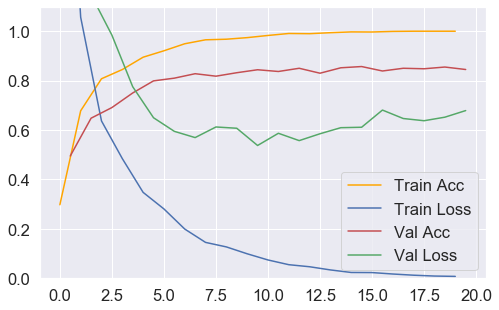

In [253]:
# PLOTTING HISTORY FOR DEFAULT CNN 
plot_history(history_default)

#### We can see that our default model is overfitting on the training data 
#### But still achieveing respectable accuracy in validation and test data given below

In [257]:
print("THE VALIDATION ACCURACY OF THE ABOVE MODEL IS " + "\033[1m"+ str(valacc_default)+ "\033[0m")

THE VALIDATION ACCURACY OF THE ABOVE MODEL IS 0.8569999933242798


In [258]:
print("THE TEST ACCURACY OF THE ABOVE MODEL IS " + "\033[1m"+ str(testacc_default)+ "\033[0m")

THE TEST ACCURACY OF THE ABOVE MODEL IS 0.8420000076293945


In [259]:
model_default.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
flatten_20 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_47 (Dense)             (None, 25)                320025    
Total params: 394,521
Trainable params: 394,521
Non-trainable params: 0
_________________________________________________________________


### 2.4 Initial Network Exploration
- We will now look at a couple of imperfect cases to get a feeling for what happens in different training situations

### Question 2.5
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

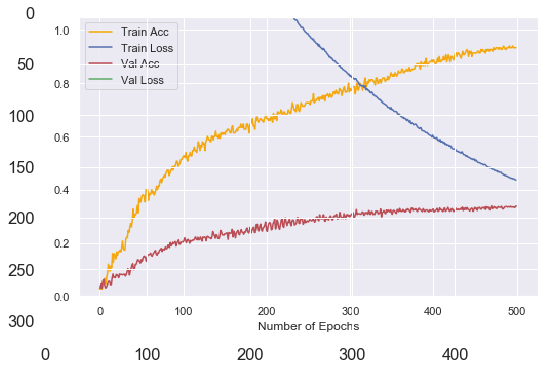

In [260]:
im = plt.imread('LearningPlot1.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

### In this plot, first this is  (b) OVERFITTING as Training Accuracy is really high compared to the Validation Accuracy
### Also this is (d) NOT CONVERGED as we can clearly the both the accuracies are Not Coverging

### Question 2.6
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

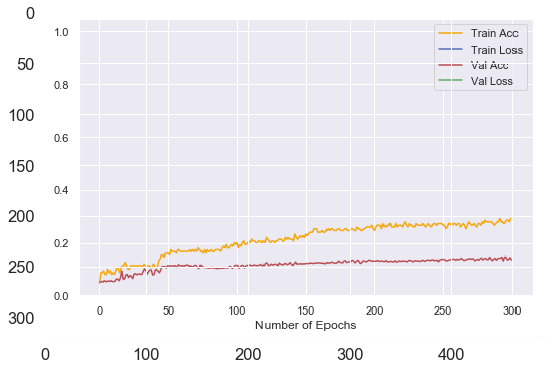

In [261]:
im = plt.imread('LearningPlot2.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

### We can clearly se this is (a) UNDERFITTING as our model fails to sufficiently learn the problem and as a result accuracy on both training as well as validation data is really low.

### Question 2.7
 - Name something that you could do to alleviate problems due to (a) overfitting and (b) underfitting. Provide separate answers for (a) and (b).

### ANS-> (a) -> OVERFITTING can be overcomed by
### - training the network on more examples.
### - regularization methods such as dropout, L1/L2  or  use early stopping with dropout and a weight constraint.
### - Use architectures that generalize well or Reduce architecture complexity
### ANS-> (b) -> UNDERFITTING can be overcomed by  
### - increasing the capacity of the network or parameters
### - Remove noise from the data.
### - Increase the number of epochs or increase the duration of training to get better results from our model

***

## 3. Main Network Optimisation (50%)

In this section you will undertake the main task of going through the process to find a deep learning solution to this problem that is (within limits) optimised to this specific case.

The following settings for the networks will be fixed:
 - Batch size of 50
 - Maximum number of epochs of 100, but implement *early stopping*
 - Use the *Adam* optimiser
 - Use the *ELU* activation function for all hidden layers (although ReLU is very common, we will explore ELU for this assignment)
 - Use the He Uniform initialization for weights (pass *kernel_initializer="he_uniform"* into the layer specifications)
 - Training/Validation/Testing set sizes are 2500/1000/1000 as described above (with the validation set derived from the original test dataset) unless you needed to reduce the training set size based on your timing tests

You will investigate **both** fully connected and CNN architectures, with the following possibilities:
 - **Number of hidden or Conv2D layers** can be **1, 2 or 3**, but no more (this does *not* count the final dense layer in a CNN)
 - **Number of hidden nodes** (fully connected network) or **number of filters** (in a Conv2D layer of a CNN) can be: **32, 64, 128 or 256** (no other values can be used)
 - A constant **learning rate** should be used (no varying schedules) where the value can be adjusted to be **0.1, 1.0, 10.0 and 100.0** **times the default rate** (these are the only values you can use)
 - CNN architectures will always follow the pattern of Conv2D followed immediately by MaxPooling, with the dense layer following the final Conv2D: e.g. C2-D or C2-MP-C2-D or C2-MP-C2-MP-C2-D (where C2=Conv2D, MP=MaxPooling and D=dense) - note that this is the same pattern used in the code from workshops 8, 9 and 10

Note that the patience setting in the early stopping can be adjusted, but is not considered a "parameter" as such.

A fixed training/validation/test split will be used throughout.

The objective is for you to go through a systematic process for finding a good network that could be adapted to work for other problems. It is the process, rather than the final results, that are more important here (it is not a competition based on results, but an exercise in learning how to approach such problems in a good way). So clearly explain your process, document your code and show appropriate results as you go. In particular, make a summary at the end, in a separate cell, of all the learning rate curves and any other key pieces of information that you used for comparing models and parameter settings.

Remember that the following exploration options exist:
 - Random search through parameter space (noting that here most of the "parameters" are ones that specify the network architecture)
 - Grid search
 - Individual parameter sweeps (varying only one parameter whilst keeping others fixed)
 - These can also be combined together and/or iterated
 
Before writing any code, answer the following two questions and, after that, design and implement your optimisation process to select the "best" network.

### Question 3.1
- What approach will you take to this optimisation?  Summarise your main strategy (or strategies) in a few lines here, pointing out any major advantages or disadvantages.

### For FULLY Connected & CNN -
#### We will take the maximum number of layers allowed i.e. 3 with nodes increasing after each layer as 64,128,256
#### - This will in increase the complexity of architecture 
#### - A constant learning rate of .0001 has been taken

### ADVANTAGES
#### - Model becomes more deep
#### - because of early stopping even though more computational power required, it will reduce time significantly

### DISADVANTAGES
#### - More layers can lead to overfitting ( which we observe in training model below ).
#### - Increase in training time for both of our Models because of complex architecture.


### Question 3.2
 - When comparing models (either completely different networks or just two networks with different options/parameter settings), what is the best metric to use: accuracy or loss? And should it be calculated on the training set, validation set or test set?  Give reasons for your answer.

#### Accuracy is generally the best metric to measure performace as -
- #### Accuracy is the measure of how accurate your model's prediction is compared to the true data.
- #### The loss is calculated on the training and validation and its interpretation is based on how well these two sets do the model. Loss value implies how a model is behaving poorly or well after each optimization iteration.
- #### Unlike accuracy, loss is not a percentage. It is a summation of the errors made for each example in training or validation sets.

### 3.3 Now write the code for this section, and below that, in a separate cell, summarise your results.

In [274]:
# using ELU fuction 
actfn = "elu"
classes = 25

#increse the number of epoch to 100 
n_epochs=100
batch_size = 50

# taking the kernal initizlizer as "he_uniform"
krnl_initiz = 'he_uniform'

# taking a constant learning rate, (in section 2 we used a variable learning rate)
Learning_rate = .0001

In [275]:
# we will use the earling stopping function, which will come handy as number of epoch are much higher than before
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True) 

In [276]:
# defining a function which will give us fully connected model with three layers with nodes 64,128,256
def fully_connected(actfn,classes,rate ):
    model_full = Sequential()
    model_full.add(keras.layers.Flatten(input_shape = [28 , 28,1]))
    model_full.add(keras.layers.Dense(64, activation =actfn,kernel_initializer=krnl_initiz))  
    model_full.add(keras.layers.Dense(128, activation =actfn,kernel_initializer=krnl_initiz))  
    model_full.add(keras.layers.Dense(256, activation =actfn,kernel_initializer=krnl_initiz))  
    model_full.add(Dense(classes, activation = "softmax",kernel_initializer=krnl_initiz))
    model_full.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(rate),metrics=['accuracy'])
    return model_full

In [277]:
# This function is same as before with one extra parameter passed for kernal initializer 
# will fit our model on trainig and validation data and give results for test data 
def do_all_full(actfn,classes,n_epochs, batch_size,krnl_initiz,rate):
    
    model = fully_connected(actfn,classes,rate)
    start_time = time.time()
    history = model.fit(x_train,Y_train_fixed, epochs=n_epochs,
                        batch_size=batch_size,
                        validation_data=(x_validation, Y_validation_fixed),callbacks = [early_stopping_cb],)
    print('minutes: ',(time.time() - start_time)/60)
    
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(x_test, Y_test_fixed, verbose=0)
    
    return (max_val_acc, testres[1], history, model)

In [278]:
valacc_full, testacc_full, history_full, model_full = do_all_full(actfn,classes,n_epochs, batch_size,krnl_initiz,Learning_rate)

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 0s 148us/step - loss: 3.1489 - accuracy: 0.0884 - val_loss: 3.0510 - val_accuracy: 0.0910
Epoch 2/100
2500/2500 [==============================] - 0s 93us/step - loss: 2.9004 - accuracy: 0.1544 - val_loss: 2.8942 - val_accuracy: 0.1790
Epoch 3/100
2500/2500 [==============================] - 0s 94us/step - loss: 2.6925 - accuracy: 0.2416 - val_loss: 2.6826 - val_accuracy: 0.2530
Epoch 4/100
2500/2500 [==============================] - 0s 93us/step - loss: 2.4916 - accuracy: 0.3032 - val_loss: 2.5318 - val_accuracy: 0.2860
Epoch 5/100
2500/2500 [==============================] - 0s 92us/step - loss: 2.3062 - accuracy: 0.3536 - val_loss: 2.3945 - val_accuracy: 0.3110
Epoch 6/100
2500/2500 [==============================] - 0s 92us/step - loss: 2.1539 - accuracy: 0.3920 - val_loss: 2.2140 - val_accuracy: 0.3490
Epoch 7/100
2500/2500 [==============================] - 0s 109us/step - lo

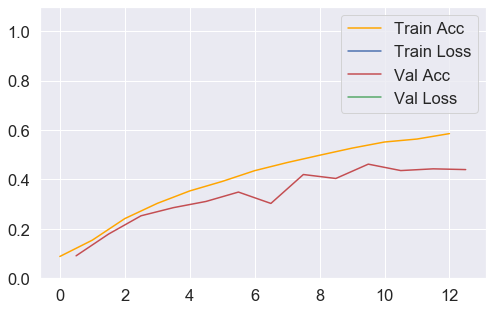

In [279]:
plot_history(history_full)

In [280]:
print("THE VALIDATION ACCURACY OF THE Fully Connected MODEL IS " + "\033[1m"+ str(valacc_full)+ "\033[0m")

THE VALIDATION ACCURACY OF THE Fully Connected MODEL IS 0.4620000123977661


In [281]:
print("THE VALIDATION ACCURACY OF THE ABOVE MODEL IS " + "\033[1m"+ str(testacc_full)+ "\033[0m")

THE VALIDATION ACCURACY OF THE ABOVE MODEL IS 0.45100000500679016


In [282]:
# summary for our fully connected model 
model_full.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_58 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_59 (Dense)             (None, 25)                6425      
Total params: 98,009
Trainable params: 98,009
Non-trainable params: 0
_________________________________________________________________


Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 0s 156us/step - loss: 3.7021 - accuracy: 0.0492 - val_loss: 3.4627 - val_accuracy: 0.0450
Epoch 2/100
2500/2500 [==============================] - 0s 106us/step - loss: 3.3968 - accuracy: 0.0396 - val_loss: 3.3444 - val_accuracy: 0.0440
Epoch 3/100
2500/2500 [==============================] - 0s 98us/step - loss: 3.2896 - accuracy: 0.0448 - val_loss: 3.3023 - val_accuracy: 0.0580
Epoch 4/100
2500/2500 [==============================] - 0s 106us/step - loss: 3.2427 - accuracy: 0.0440 - val_loss: 3.2780 - val_accuracy: 0.0540
Epoch 5/100
2500/2500 [==============================] - 0s 95us/step - loss: 3.2116 - accuracy: 0.0456 - val_loss: 3.2594 - val_accuracy: 0.0500
Epoch 6/100
2500/2500 [==============================] - 0s 178us/step - loss: 3.1860 - accuracy: 0.0528 - val_loss: 3.2385 - val_accuracy: 0.0570
minutes:  0.037575602531433105


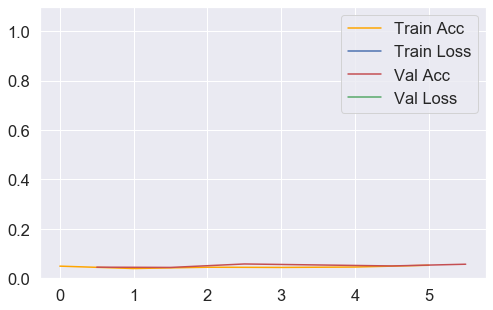

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 0s 143us/step - loss: 3.2989 - accuracy: 0.0484 - val_loss: 3.1995 - val_accuracy: 0.0590
Epoch 2/100
2500/2500 [==============================] - 0s 111us/step - loss: 3.0430 - accuracy: 0.1128 - val_loss: 3.0097 - val_accuracy: 0.0880
Epoch 3/100
2500/2500 [==============================] - 0s 127us/step - loss: 2.8460 - accuracy: 0.1860 - val_loss: 2.8473 - val_accuracy: 0.1590
Epoch 4/100
2500/2500 [==============================] - 0s 113us/step - loss: 2.6583 - accuracy: 0.2452 - val_loss: 2.6946 - val_accuracy: 0.2210
Epoch 5/100
2500/2500 [==============================] - 0s 98us/step - loss: 2.4762 - accuracy: 0.3076 - val_loss: 2.5248 - val_accuracy: 0.2840
Epoch 6/100
2500/2500 [==============================] - 0s 93us/step - loss: 2.2954 - accuracy: 0.3736 - val_loss: 2.4493 - val_accuracy: 0.2760
Epoch 7/100
2500/2500 [==============================] - 0s 161us/step -

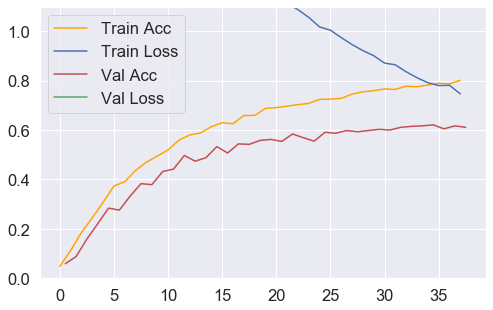

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 204us/step - loss: 2.9549 - accuracy: 0.1432 - val_loss: 2.5911 - val_accuracy: 0.2330
Epoch 2/100
2500/2500 [==============================] - 0s 116us/step - loss: 2.1548 - accuracy: 0.3372 - val_loss: 1.9675 - val_accuracy: 0.3870
Epoch 3/100
2500/2500 [==============================] - 0s 133us/step - loss: 1.6591 - accuracy: 0.4832 - val_loss: 1.8284 - val_accuracy: 0.3840
Epoch 4/100
2500/2500 [==============================] - 0s 118us/step - loss: 1.4497 - accuracy: 0.5340 - val_loss: 1.4893 - val_accuracy: 0.5120
Epoch 5/100
2500/2500 [==============================] - 0s 112us/step - loss: 1.2203 - accuracy: 0.6028 - val_loss: 1.4022 - val_accuracy: 0.5600
Epoch 6/100
2500/2500 [==============================] - 0s 134us/step - loss: 1.1229 - accuracy: 0.6348 - val_loss: 1.3520 - val_accuracy: 0.5780
Epoch 7/100
2500/2500 [==============================] - 0s 132us/step

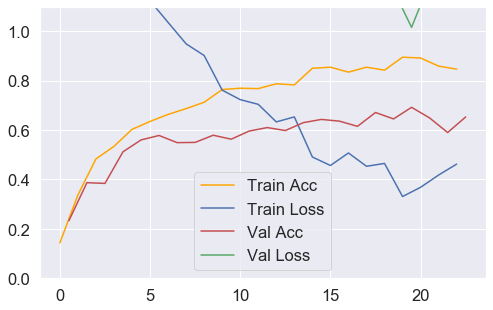

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 0s 195us/step - loss: 5.3049 - accuracy: 0.0636 - val_loss: 3.1562 - val_accuracy: 0.0710
Epoch 2/100
2500/2500 [==============================] - 0s 134us/step - loss: 2.8441 - accuracy: 0.1536 - val_loss: 2.8757 - val_accuracy: 0.1460
Epoch 3/100
2500/2500 [==============================] - 0s 121us/step - loss: 2.4711 - accuracy: 0.2212 - val_loss: 2.4613 - val_accuracy: 0.2440
Epoch 4/100
2500/2500 [==============================] - 0s 109us/step - loss: 2.1712 - accuracy: 0.2896 - val_loss: 2.5248 - val_accuracy: 0.2260
Epoch 5/100
2500/2500 [==============================] - 0s 103us/step - loss: 2.1003 - accuracy: 0.3200 - val_loss: 2.4953 - val_accuracy: 0.2740
Epoch 6/100
2500/2500 [==============================] - 0s 87us/step - loss: 1.9953 - accuracy: 0.3556 - val_loss: 2.0996 - val_accuracy: 0.3630
Epoch 7/100
2500/2500 [==============================] - 0s 83us/step -

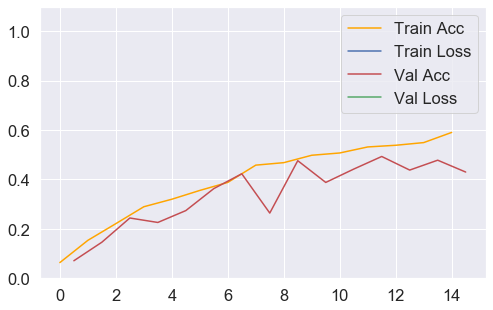

[[1e-05, 0.057999998331069946, 0.05700000002980232], [0.0001, 0.6209999918937683, 0.6019999980926514], [0.001, 0.6919999718666077, 0.6930000185966492], [0.01, 0.49300000071525574, 0.47600001096725464]]


In [283]:
# Learning rate should only be 0.1, 1.0, 10.0 and 100.0 times the default rate
# here we will try to optimize the learning rate 
res_full=[]
for lr_full in [0.1, 1, 10, 100]:
    valacc_param_full, testacc_param_full, history_param_full, discard_full = do_all_full(actfn,classes,n_epochs, batch_size,krnl_initiz,lr_full*Learning_rate)
    plot_history(history_param_full)
    res_full += [[lr_full*Learning_rate,valacc_param_full,testacc_param_full]]
print(res_full)

## here we can see that we are getting best performance for Learning rate 0.001
### so will change our learning rate to 0.001 
### and we can see that having more layers and nodes is not overfitting our model. 

In [284]:
new_learning_rate_full = 0.001

In [285]:
valacc_full_new, testacc_full_new, history_full_new, model_full_new = do_all_full(actfn,classes,n_epochs, batch_size,krnl_initiz,new_learning_rate_full)

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 261us/step - loss: 3.0195 - accuracy: 0.1380 - val_loss: 2.5653 - val_accuracy: 0.2500
Epoch 2/100
2500/2500 [==============================] - 0s 94us/step - loss: 2.1608 - accuracy: 0.3400 - val_loss: 2.0686 - val_accuracy: 0.3430
Epoch 3/100
2500/2500 [==============================] - 0s 91us/step - loss: 1.6473 - accuracy: 0.4876 - val_loss: 1.6298 - val_accuracy: 0.4780
Epoch 4/100
2500/2500 [==============================] - 0s 91us/step - loss: 1.4354 - accuracy: 0.5412 - val_loss: 1.5657 - val_accuracy: 0.4960
Epoch 5/100
2500/2500 [==============================] - 0s 129us/step - loss: 1.2708 - accuracy: 0.5944 - val_loss: 1.5562 - val_accuracy: 0.5120
Epoch 6/100
2500/2500 [==============================] - 0s 191us/step - loss: 1.1404 - accuracy: 0.6340 - val_loss: 1.3533 - val_accuracy: 0.5610
Epoch 7/100
2500/2500 [==============================] - 0s 163us/step - 

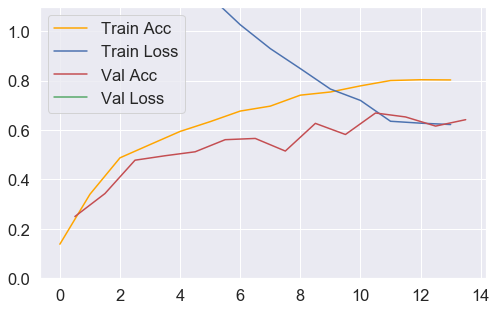

In [286]:
plot_history(history_full_new)

In [287]:
print("THE VALIDATION ACCURACY OF THE new Fully Connected MODEL IS " + "\033[1m"+ str(valacc_full_new)+ "\033[0m")

THE VALIDATION ACCURACY OF THE new Fully Connected MODEL IS 0.6690000295639038


In [288]:
print("THE TEST ACCURACY OF THE new Fully Connected MODEL IS " + "\033[1m"+ str(testacc_full_new)+ "\033[0m")

THE TEST ACCURACY OF THE new Fully Connected MODEL IS 0.6650000214576721


In [97]:
# there is significant  increse in performance for model becz of learning rate optimization 
# this lower rate is expected when you are fixing the learning rate and not having a variable learning rate 

### CNN architecture

In [292]:
# same varibles as before
actfn = "elu"
classes = 25
n_epochs=100
batch_size = 50
krnl_initiz = 'he_uniform'
Learning_rate_cnn = .0001

In [293]:
# C2-MP-C2-MP-C2-D
# defining a CNN model function, last one can be used but we are send kernel initializer as well as 
# learning rate as our parameters 
def model_cnn_factory_3(actfn,classes,init, rate ):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(64, (3,3),padding='same',activation=actfn,kernel_initializer=init,input_shape=(28, 28, 1)))
    model_cnn.add(MaxPooling2D(pool_size=(3,3),padding='same'))
    model_cnn.add(Conv2D(128, (3,3),padding='same',activation=actfn,kernel_initializer=init,input_shape=(28, 28, 1)))
    model_cnn.add(MaxPooling2D(pool_size=(3,3),padding='same'))
    model_cnn.add(Conv2D(256, (3,3),padding='same',activation=actfn,kernel_initializer=init,input_shape=(28, 28, 1)))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=classes, activation='softmax'))
    model_cnn.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(Learning_rate_cnn),metrics=['accuracy'])
    return model_cnn

In [294]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True) 

In [295]:
def do_all_cnn_3(actfn,classes,n_epochs, batch_size,init,rate):
    
    model = model_cnn_factory_3(actfn,classes,init, rate)
    start_time = time.time()
    history = model.fit(x_train,Y_train_fixed, epochs=n_epochs,batch_size=batch_size,
                        validation_data=(x_validation, Y_validation_fixed),callbacks = [early_stopping_cb])
    print('minutes: ',(time.time() - start_time)/60)
    
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(x_test, Y_test_fixed, verbose=0)
    
    return (max_val_acc, testres[1], history, model)

In [296]:
valacc_cnn_3, testacc_cnn_3, history_cnn_3, model_cnn_3 = do_all_cnn_3(actfn,classes,n_epochs, batch_size,krnl_initiz, Learning_rate_cnn)

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 6s 2ms/step - loss: 3.2001 - accuracy: 0.0860 - val_loss: 2.9259 - val_accuracy: 0.1720
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 2.7089 - accuracy: 0.2460 - val_loss: 2.6315 - val_accuracy: 0.2440
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3097 - accuracy: 0.4076 - val_loss: 2.3660 - val_accuracy: 0.3560
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9711 - accuracy: 0.5044 - val_loss: 1.9727 - val_accuracy: 0.4810
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6533 - accuracy: 0.6024 - val_loss: 1.8057 - val_accuracy: 0.5050
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.4197 - accuracy: 0.6384 - val_loss: 1.5790 - val_accuracy: 0.5890
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.206

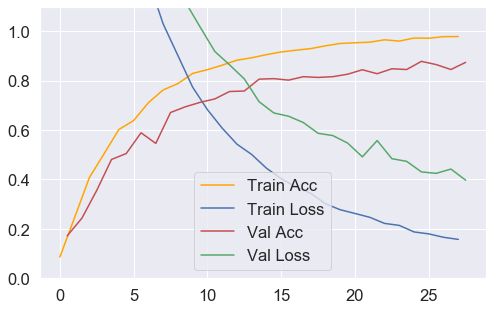

In [297]:
plot_history(history_cnn_3)

In [301]:
print("THE VALIDATION ACCURACY OF THE CNN MODEL IS " + "\033[1m"+ str(valacc_cnn_3)+ "\033[0m")

THE VALIDATION ACCURACY OF THE CNN MODEL IS 0.878000020980835


In [302]:
print("THE TEST ACCURACY OF THE CNN MODEL IS " + "\033[1m"+ str(testacc_cnn_3)+ "\033[0m")

THE TEST ACCURACY OF THE CNN MODEL IS 0.859000027179718


### A respectable accuracy for default parameters
### But we will optimize the learning rate 

In [298]:
model_cnn_3.summary()
#C2-MP-C2-MP-C2-D

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
flatten_29 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 25)              

In [299]:
# we will now look for better learning rate

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 5s 2ms/step - loss: 3.2027 - accuracy: 0.0856 - val_loss: 2.9111 - val_accuracy: 0.1920
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 2.7212 - accuracy: 0.2500 - val_loss: 2.6391 - val_accuracy: 0.2380
Epoch 3/100
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3216 - accuracy: 0.4204 - val_loss: 2.2761 - val_accuracy: 0.3820
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9269 - accuracy: 0.5484 - val_loss: 1.8994 - val_accuracy: 0.5140
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5723 - accuracy: 0.6292 - val_loss: 1.6929 - val_accuracy: 0.5520
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.3079 - accuracy: 0.6892 - val_loss: 1.4207 - val_accuracy: 0.6180
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.088

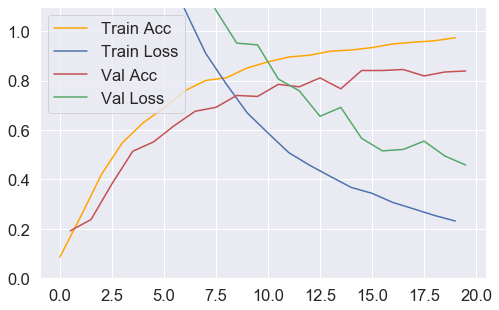

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 6s 2ms/step - loss: 3.1877 - accuracy: 0.0844 - val_loss: 2.9873 - val_accuracy: 0.1120
Epoch 2/100
2500/2500 [==============================] - 6s 2ms/step - loss: 2.6960 - accuracy: 0.2808 - val_loss: 2.7192 - val_accuracy: 0.2180
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3249 - accuracy: 0.4004 - val_loss: 2.3184 - val_accuracy: 0.3690
Epoch 4/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.9637 - accuracy: 0.4940 - val_loss: 2.0260 - val_accuracy: 0.4650
Epoch 5/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.6268 - accuracy: 0.6116 - val_loss: 1.7848 - val_accuracy: 0.4900
Epoch 6/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.3806 - accuracy: 0.6680 - val_loss: 1.5309 - val_accuracy: 0.5750
Epoch 7/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.141

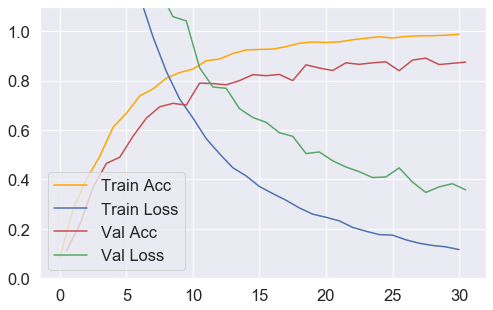

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 6s 2ms/step - loss: 3.1170 - accuracy: 0.1152 - val_loss: 3.0101 - val_accuracy: 0.1800
Epoch 2/100
2500/2500 [==============================] - 6s 2ms/step - loss: 2.6958 - accuracy: 0.2600 - val_loss: 2.6747 - val_accuracy: 0.2770
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3224 - accuracy: 0.3968 - val_loss: 2.2927 - val_accuracy: 0.3560
Epoch 4/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.9387 - accuracy: 0.5220 - val_loss: 2.0565 - val_accuracy: 0.4140
Epoch 5/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.6108 - accuracy: 0.6116 - val_loss: 1.6815 - val_accuracy: 0.5640
Epoch 6/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.3280 - accuracy: 0.6964 - val_loss: 1.4772 - val_accuracy: 0.6060
Epoch 7/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.107

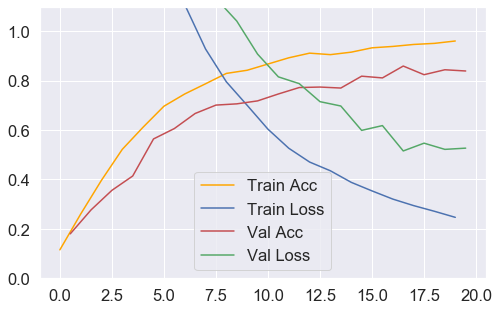

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 6s 2ms/step - loss: 3.1079 - accuracy: 0.1016 - val_loss: 2.9602 - val_accuracy: 0.1630
Epoch 2/100
2500/2500 [==============================] - 6s 2ms/step - loss: 2.6952 - accuracy: 0.2780 - val_loss: 2.6407 - val_accuracy: 0.3220
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3024 - accuracy: 0.4240 - val_loss: 2.2423 - val_accuracy: 0.4320
Epoch 4/100
2500/2500 [==============================] - 7s 3ms/step - loss: 1.9269 - accuracy: 0.5364 - val_loss: 1.9781 - val_accuracy: 0.4660
Epoch 5/100
2500/2500 [==============================] - 6s 3ms/step - loss: 1.5960 - accuracy: 0.6224 - val_loss: 1.7130 - val_accuracy: 0.4930
Epoch 6/100
2500/2500 [==============================] - 7s 3ms/step - loss: 1.3213 - accuracy: 0.6936 - val_loss: 1.4932 - val_accuracy: 0.5880
Epoch 7/100
2500/2500 [==============================] - 7s 3ms/step - loss: 1.098

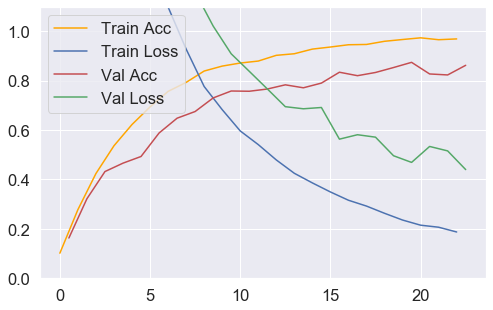

[[1e-05, 0.8450000286102295, 0.8320000171661377], [0.0001, 0.890999972820282, 0.8759999871253967], [0.001, 0.859000027179718, 0.8349999785423279], [0.01, 0.8740000128746033, 0.8550000190734863]]


In [300]:
# Learning rate should only be 0.1, 1.0, 10.0 and 100.0 times the default rate
res_cnn_new=[]
for lr_new_cnn in [0.1, 1, 10, 100]:
    valacc_param_cnn_new, testacc_param_cnn_new, history_param_cnn_new, discard_cnn_new = do_all_cnn_3(actfn,classes,n_epochs, batch_size,krnl_initiz,lr_new_cnn*Learning_rate_cnn)
    plot_history(history_param_cnn_new)
    res_cnn_new += [[lr_new_cnn*Learning_rate_cnn,valacc_param_cnn_new,testacc_param_cnn_new]]
print(res_cnn_new)

## we can see clearly see that the CNN MODEL with learning Rate = .0001 has the best accuracy and it also doesnt overfit (as on last time I ran the model) 
###### every iteration different values are coming even after random seed 

In [304]:
new_learningRate_for_cnn = 0.0001

In [305]:
valacc_cnn_optimized, testacc_cnn_optimized, history_cnn_optimized, model_optimized = do_all_cnn_3(actfn,classes,n_epochs, batch_size,krnl_initiz, new_learningRate_for_cnn)

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 5s 2ms/step - loss: 3.1953 - accuracy: 0.1156 - val_loss: 3.0433 - val_accuracy: 0.1720
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 2.7245 - accuracy: 0.2416 - val_loss: 2.7003 - val_accuracy: 0.3030
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3487 - accuracy: 0.3880 - val_loss: 2.2901 - val_accuracy: 0.3830
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9963 - accuracy: 0.5048 - val_loss: 2.0937 - val_accuracy: 0.4240
Epoch 5/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.6943 - accuracy: 0.5852 - val_loss: 1.8048 - val_accuracy: 0.4890
Epoch 6/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.4684 - accuracy: 0.6084 - val_loss: 1.6138 - val_accuracy: 0.5410
Epoch 7/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.222

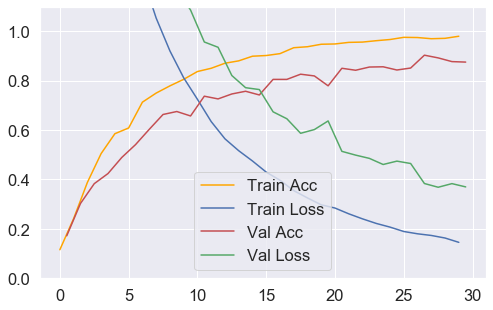

In [306]:
plot_history(history_cnn_optimized)

In [307]:
print("THE VALIDATION ACCURACY OF THE FINAL CNN MODEL IS " + "\033[1m"+ str(valacc_cnn_optimized)+ "\033[0m")

THE VALIDATION ACCURACY OF THE FINAL CNN MODEL IS 0.902999997138977


In [308]:
print("THE TEST ACCURACY OF THE FINAL CNN MODEL IS " + "\033[1m"+ str(testacc_cnn_optimized)+ "\033[0m")

THE TEST ACCURACY OF THE FINAL CNN MODEL IS 0.8730000257492065


In [309]:
## definitely an increase in performance after learning rate optimization
## good validation results and test as well
## not overfitting 

### Question 3.4

Once you have performed your systematic optimisation, choose the best network from all of your results.
- Explain why you chose this particular network.
- Were there one or more other networks with very similar performance?  
- If so, did they share particular design features (e.g. size, number of elements, etc)?

### Clearly our CNN model with optimized learning rate outperformed the Fully connected Model, and that's why we are choosing CNN model as our primary model .
### The default CNN model we built in section 2 also performed in the same way but that default model had variable learning rate, kernel_init was also default and not " he_uniform " , different epoch , No early callback
### They had the same number of layers and nodes, optimizer .

### 3.5 Show Results 
Take the best network and show the confusion matrix for its predictions.

In [310]:
models = pd.DataFrame({
    'Model': ['Fully connected network_Optimized ', 'CNN_Optimized' , ' Section 2 - Default CNN' ],
    'Testing accuracy': [testacc_full_new,testacc_cnn_optimized, testacc_default],
'Validation accuracy': [valacc_full_new,valacc_cnn_optimized, valacc_default]})
models.sort_values(by='Testing accuracy')

,Model,Testing accuracy,Validation accuracy
0,Fully connected network_Optimized,0.665,0.669
2,Section 2 - Default CNN,0.842,0.857
1,CNN_Optimized,0.873,0.903


In [311]:
model_optimized.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
flatten_34 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 25)              

In [312]:
y_prediction_test_cnn = model_optimized.predict_classes(x_test)
cm = confusion_matrix(y_test, y_prediction_test_cnn)
print(cm)

[[39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0 44  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0 40  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0 55  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50  3  0  0  0  0  0  0  1  2  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 10 48  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 41  0  4  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0 42  0  0  0  0  0  0  5  2  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0 52  1  0  0  0  0  8  0  0  0  0  0  0]
 [ 3  0  0  2  0  0  0  0  0  0  0  0 35  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

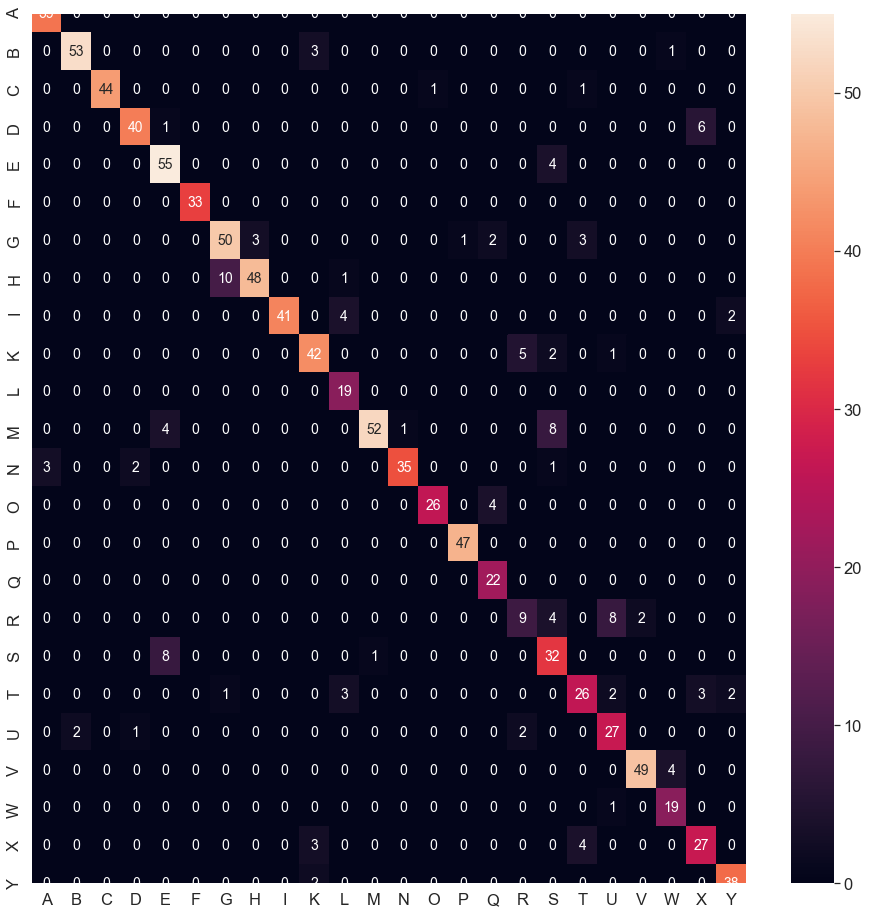

In [313]:
# the following code is for better visualization
# reference- stack overflow
df_cm = pd.DataFrame(cm, class_names, class_names)
plt.figure(figsize=(16,16))
sn.set(font_scale=1.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}) # font size

plt.show()

### Question 3.6
 - What class is misclassified the most, and what class is it most typically misclassified as?
 - Give the class numbers and show example images of these.

## Some of the most misclassified images are 
- M 
- R
- S  
- T 
- K   
- G

## M & R are the most misclassified Image, & M is most misclassfied as S , R with U


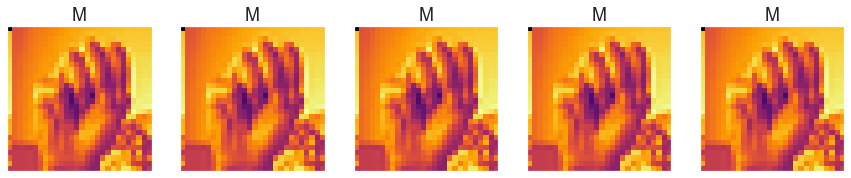

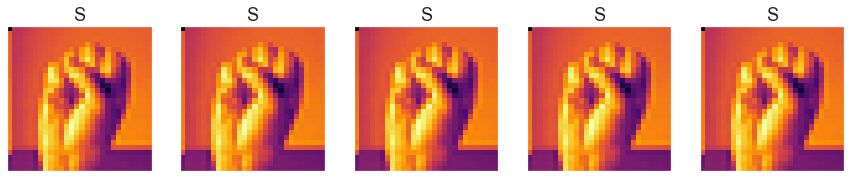

In [314]:
label_value_for_M = 12  # index for J(9) is skipped entirely but class names uniform 0-24 therefore
label_value_for_S = 18 # while printing class_names we have to decrease value by one 

fig = plt.figure(figsize=(15,5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train_full[y_train_full == label_value_for_M])[0],cmap='inferno')
    ax.set_title(class_names[label_value_for_M-1])
plt.show()

fig = plt.figure(figsize=(15,5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train_full[y_train_full == label_value_for_S])[0],cmap='inferno')
    ax.set_title(class_names[label_value_for_S-1])
plt.show()

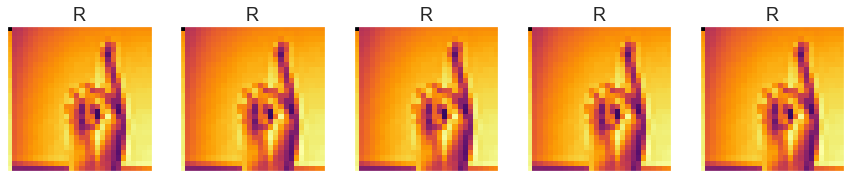

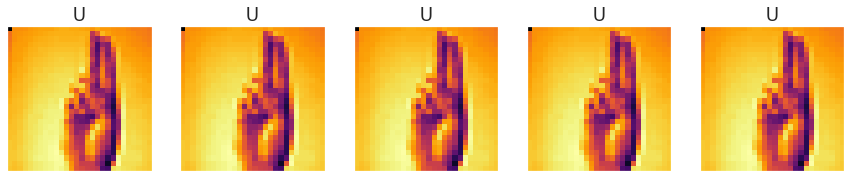

In [316]:
label_value_for_R = 17  # index for J(9) is skipped entirely but class names uniform 0-24 therefore
label_value_for_U = 20 # while printing class_names we have to decrease value by one 
fig = plt.figure(figsize=(15,5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train_full[y_train_full == label_value_for_R])[0],cmap='inferno')
    ax.set_title(class_names[label_value_for_R-1])
plt.show()

fig = plt.figure(figsize=(15,5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train_full[y_train_full == label_value_for_U])[0],cmap='inferno')
    ax.set_title(class_names[label_value_for_U-1])
plt.show()

## We can clearly see that even to human eye these images are quite similar, and variations are quite low for the algorithm to detect 

### Question 3.7
 - Summarise (in about 2-3 sentences) what you found out about the tuning and model comparisons that you have done in this section.
 - What aspects (if any) do you think might need to be modified for other problems (e.g. those with much larger datasets)? 

- ## Summary
- - ### Firstly, defining a constant learning rate has a significant impact on the performance of model.
- - ### Secondly, increasing the layers and nodes can also lead to better performance. 
- - ### Thirdly, as we kept layers and nodes constant, increasing the number of epochs which indicates the number of passes of the entire training dataset, can increase the performance of model. Although risk of overfitting is there, but as a good data analyst you should start with you model overfitting and then reduce the parameters accordingly to reduce overfitting. 

- ## Modifications
- - ### For larger datasets, there will definitely be a risk a overfitting as we have increased the complexity of our architecture so we have reduce the architecture of our model according to the overfitting that is occuring 
- - ### The computational time for larger will be significantly increased so we need to have a proper machine for it which will not crash 

***

## 4. Free Choice Element (10%)

In this section you can choose to investigate **just one** of the following options for improving the classification performance. Make sure that you explain your process and show appropriate results. Again, the final results are not that important - it is the process that counts.

Options are:
 - Implement new layers such as Dropout and BatchNormalization (see chapter 11 of Géron)
 - Try alternative and deeper CNN layouts, varying the number of Conv2D and MaxPooling layers and their ordering
 - Investigate the effects of larger networks, as well as changing at least one of the following: optimiser, activation function, batch size and/or training set size
 - Create an Ensemble of different networks and investigate the performance
 - Explore a different style of deep learning network (e.g. ResNet - see chapter 14 of Géron)
 
Report your findings and show the final results.

In [199]:
## IN FREE CHOICE WE ARE GOING TO ADD 
## BATCH NORMALIZATION AND DROPOUT LAYER IN OUR CNN MODEL
actfn = "elu"
classes = 25
n_epochs=100
batch_size = 50
krnl_initiz = 'he_uniform'

# Keeping the best learning rate from above optimization
Best_Learning_rate = 0.0001

In [319]:
def model_cnn_factory_freeChoice(actfn,classes,rate ):
    model_cnn_free = Sequential()
    model_cnn_free.add(Conv2D(64, (3,3),padding='same',activation=actfn,kernel_initializer=krnl_initiz,input_shape=(28, 28, 1)))
    
    ## applying batch normalization to the model
    model_cnn_free.add(keras.layers.BatchNormalization())
    model_cnn_free.add(MaxPooling2D(pool_size=(3,3),padding='same'))
    model_cnn_free.add(Conv2D(128, (3,3),padding='same',activation=actfn,kernel_initializer=krnl_initiz,input_shape=(28, 28, 1)))
    model_cnn_free.add(MaxPooling2D(pool_size=(3,3),padding='same'))
    model_cnn_free.add(Conv2D(256, (3,3),padding='same',activation=actfn,kernel_initializer=krnl_initiz,input_shape=(28, 28, 1)))
    
    # We are adding only one dropout layer 
    model_cnn_free.add(keras.layers.Dropout(rate=0.2))
    model_cnn_free.add(Flatten())
    model_cnn_free.add(Dense(units=classes, activation='softmax'))
    model_cnn_free.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(rate),metrics=['accuracy'])
    return model_cnn_free

In [320]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True) 

In [321]:
def do_all_cnn_Batch(actfn,classes,n_epochs, batch_size,krnl_initiz,rate):
    
    model = model_cnn_factory_freeChoice(actfn,classes,rate)
    start_time = time.time()
    history = model.fit(x_train,Y_train_fixed, epochs=n_epochs,batch_size=batch_size,
                        validation_data=(x_validation, Y_validation_fixed),callbacks = [early_stopping_cb])
    print('minutes: ',(time.time() - start_time)/60)
    
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(x_test, Y_test_fixed, verbose=0)
    
    return (max_val_acc, testres[1], history, model)

In [322]:
valacc_cnn_batch, testacc_cnn_batch, history_cnn_batch, model_batch = do_all_cnn_Batch(actfn,classes,n_epochs, batch_size,krnl_initiz,Best_Learning_rate)

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 8s 3ms/step - loss: 4.1812 - accuracy: 0.0572 - val_loss: 3.5123 - val_accuracy: 0.0430
Epoch 2/100
2500/2500 [==============================] - 9s 4ms/step - loss: 3.5302 - accuracy: 0.0720 - val_loss: 3.2940 - val_accuracy: 0.0620
Epoch 3/100
2500/2500 [==============================] - 7s 3ms/step - loss: 3.2103 - accuracy: 0.1112 - val_loss: 3.0953 - val_accuracy: 0.0730
Epoch 4/100
2500/2500 [==============================] - 7s 3ms/step - loss: 2.9810 - accuracy: 0.1440 - val_loss: 2.9275 - val_accuracy: 0.1190
Epoch 5/100
2500/2500 [==============================] - 7s 3ms/step - loss: 2.7811 - accuracy: 0.1940 - val_loss: 2.7547 - val_accuracy: 0.1780
Epoch 6/100
2500/2500 [==============================] - 10s 4ms/step - loss: 2.6038 - accuracy: 0.2384 - val_loss: 2.6082 - val_accuracy: 0.2350
Epoch 7/100
2500/2500 [==============================] - 9s 4ms/step - loss: 2.46

Epoch 57/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.4195 - accuracy: 0.9096 - val_loss: 0.7006 - val_accuracy: 0.7890
Epoch 58/100
2500/2500 [==============================] - 9s 4ms/step - loss: 0.3981 - accuracy: 0.9072 - val_loss: 0.6885 - val_accuracy: 0.7880
Epoch 59/100
2500/2500 [==============================] - 9s 4ms/step - loss: 0.3959 - accuracy: 0.9188 - val_loss: 0.6724 - val_accuracy: 0.7930
Epoch 60/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3944 - accuracy: 0.9116 - val_loss: 0.6552 - val_accuracy: 0.8010
Epoch 61/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3674 - accuracy: 0.9292 - val_loss: 0.6584 - val_accuracy: 0.7980
Epoch 62/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3689 - accuracy: 0.9140 - val_loss: 0.6497 - val_accuracy: 0.8070
Epoch 63/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3581 - accuracy: 0.9256 - val_loss: 0.6286 -

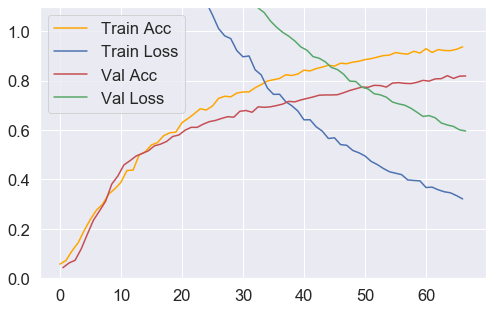

In [323]:
plot_history(history_cnn_batch)

### Looks like accuracy and losses are running parallel to each other, not overfitting and reaching a convergence. 
### This is a result of Batch Normalization, 
### This also Increased the Complexity as it took 9.5 Minutes to run this model 

In [328]:
print("THE VALIDATION ACCURACY OF Bath Normal CNN MODEL IS " + "\033[1m"+ str(valacc_cnn_batch)+ "\033[0m")

THE VALIDATION ACCURACY OF Bath Normal CNN MODEL IS 0.8199999928474426


In [329]:
print("THE VALIDATION ACCURACY OF Bath Normal CNN MODEL IS " + "\033[1m"+ str(testacc_cnn_batch)+ "\033[0m")

THE VALIDATION ACCURACY OF Bath Normal CNN MODEL IS 0.8080000281333923


### End
##### ps- <br> I would like to thank Prof. Anthony Dick, Prof. Stephan Lau and Prof. Mark Jenkinson for all their help. This would not have been possible without them.  <br> Kind regards <br>  Shubham Gupta

***